# Example of Stationary Periodic Signals 

In [7]:
# An R Package of time series tools and utilities; Rmetrics - Financial Time Series Objects
#https://www.rdocumentation.org/packages/timeSeries
#install.packages("timeSeries")
require(timeSeries)

# An R package with a collection of econometric functions for performance and risk analysis
#https://www.rdocumentation.org/packages/PerformanceAnalytics
#install.packages("PerformanceAnalytics")
require(PerformanceAnalytics)

# An R package for Wavelet analysis and reconstruction of time series, 
# cross-wavelets and phase-difference (with filtering options), 
# significance with simulation algorithms.
# https://www.rdocumentation.org/packages/WaveletComp/versions/1.0
#install.packages("WaveletComp")
require(WaveletComp)

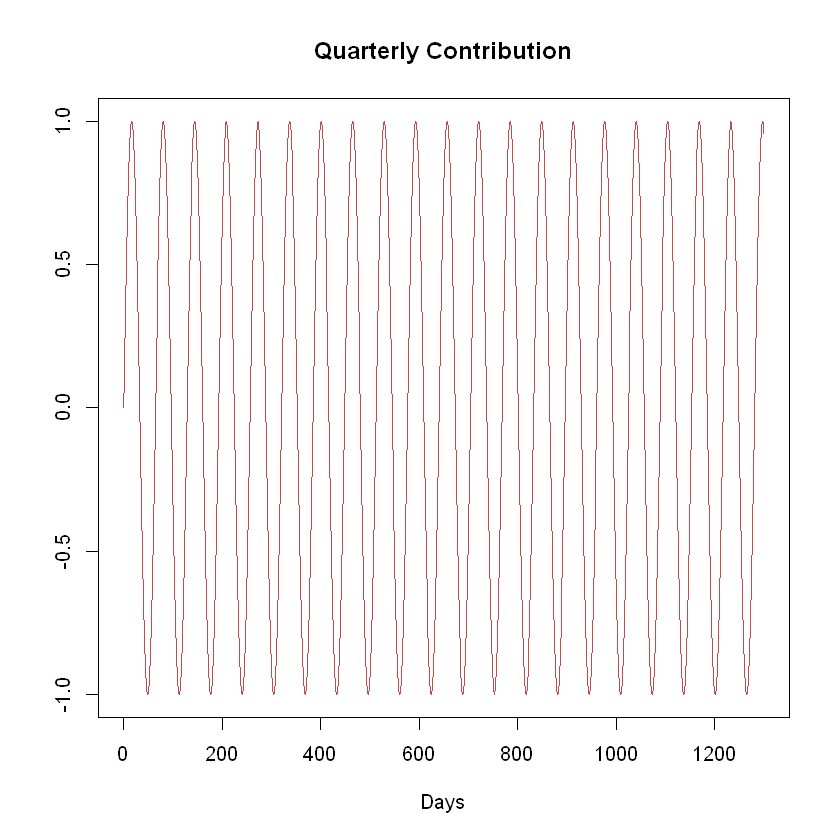

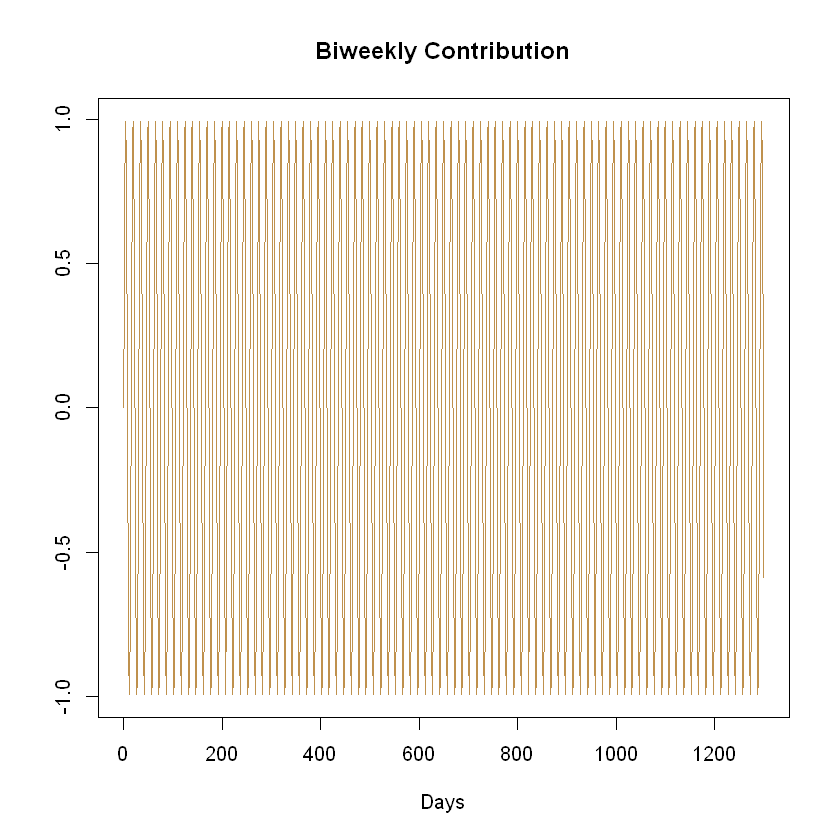

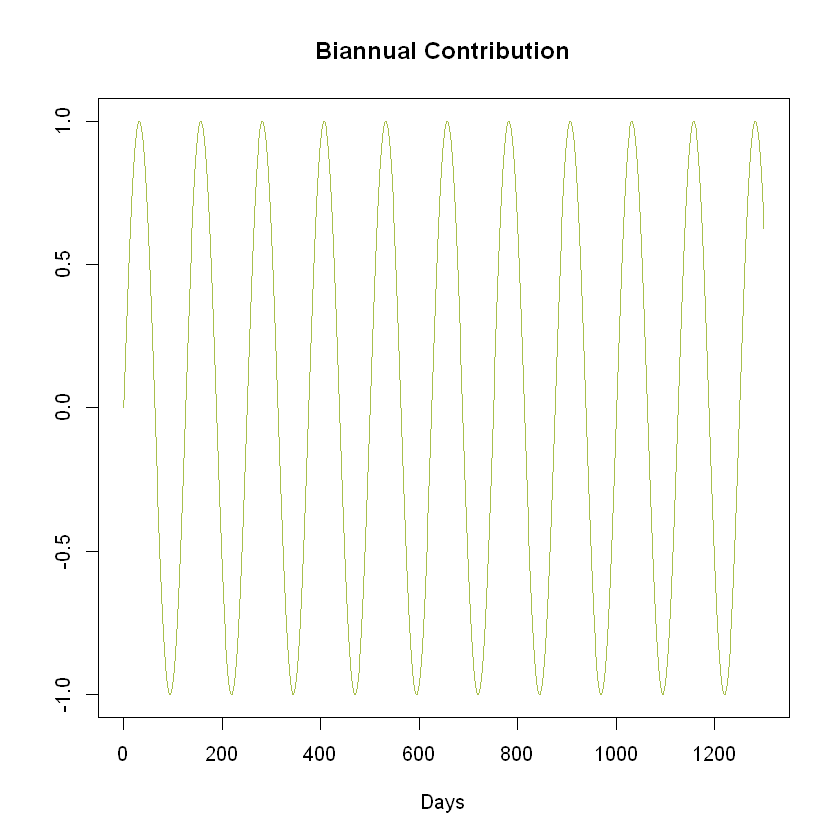

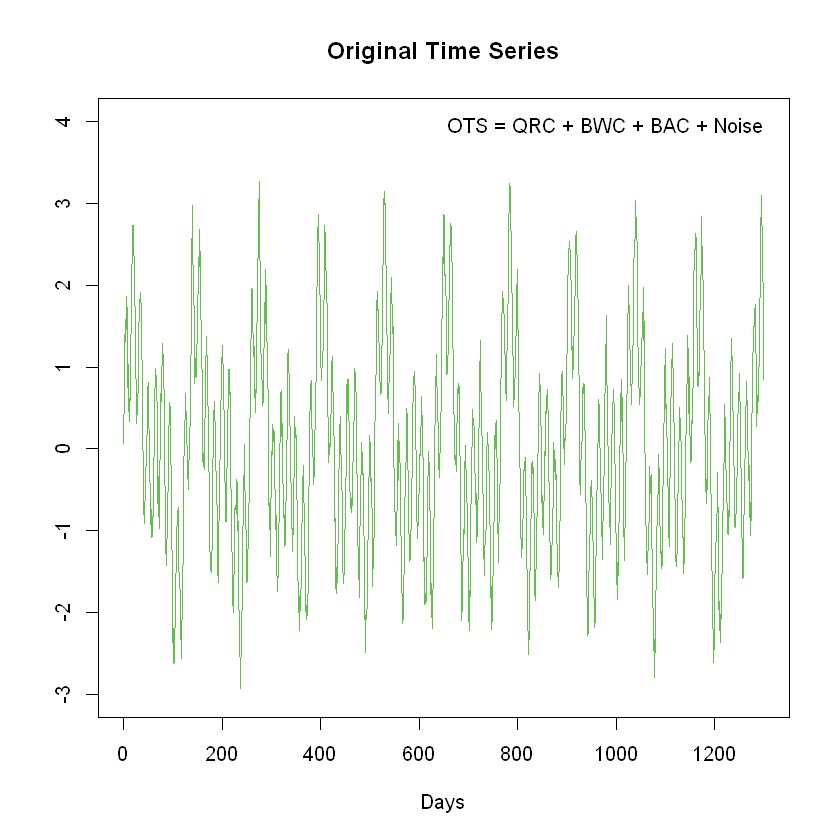

In [6]:
# Quarterly Investment Horizon
x1 <- periodic.series(start.period = 64, length = 1300)
plot.ts(x1, main = "Quarterly Contribution", ylab = " ", xlab = "Days", col = rainbow10equal[1])
# Biweekly Investment Horizon
x2 <- periodic.series(start.period = 15, length = 1300)
plot.ts(x2, main = "Biweekly Contribution", ylab = " ", xlab = "Days", col = rainbow10equal[2])
# Biannual Investment Horizon
x3 <- periodic.series(start.period = 125, length = 1300)
plot.ts(x3, main = "Biannual Contribution", ylab = " ", xlab = "Days", col = rainbow10equal[3])

In [ ]:
#Add up all the contributions
x <- x1 + x2 + x3 + 0.2*rnorm(1300)

# Plot the final form
plot.ts(x, main = "Original Time Series", ylab = " ", xlab = "Days", col = rainbow10equal[4], ylim = c(-3, 4))
legend("topright", legend = "OTS = QRC + BWC + BAC + Noise", bty = "n")

# CWT Power Spectrum

Starting wavelet transformation...
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


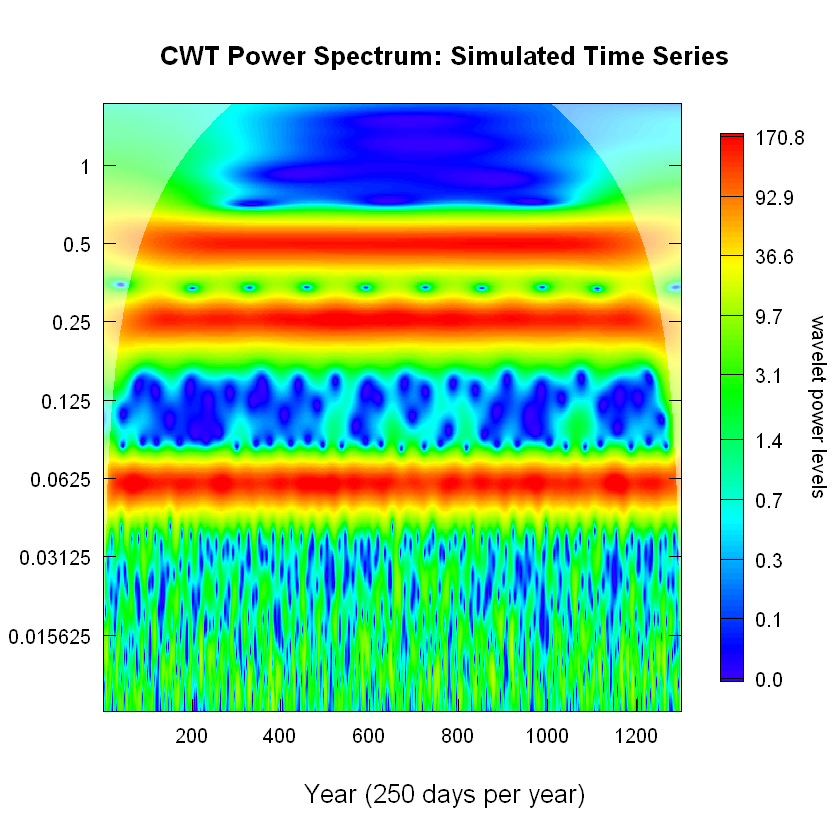

In [5]:
# Place the additive series in a data.frame
my.data <- data.frame(x = x)
# Analyze the time series using a the package WaveletComp

# For help see:
?analyze.wavelet

my.w <- analyze.wavelet(my.data, "x",
                        loess.span = 0,
                        dt = 1/250, dj = 1/64,
                        make.pval = F, n.sim = 10)
wt.image(my.w, periodlab = " ",timelab = "  " , main = " ",
         legend.params = list(lab = "wavelet power levels", mar = 5.1, cex = 4, n.ticks = 10), 
         color.key = "quantile", lwd = 2, plot.ridge = FALSE)
title("CWT Power Spectrum: Simulated Time Series", cex.main = 1.3, 
      xlab = "Year (250 days per year)", ylab = " ", cex.lab = 1.3)

# Creating the table using matrix form:
#as.matrix(my.w$Power[c(193, 319, 383), 1:10])